In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv("BTC-USD.csv")
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0


In [3]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2637,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2638,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2639,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2640,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [4]:
df.shape

(2638, 7)

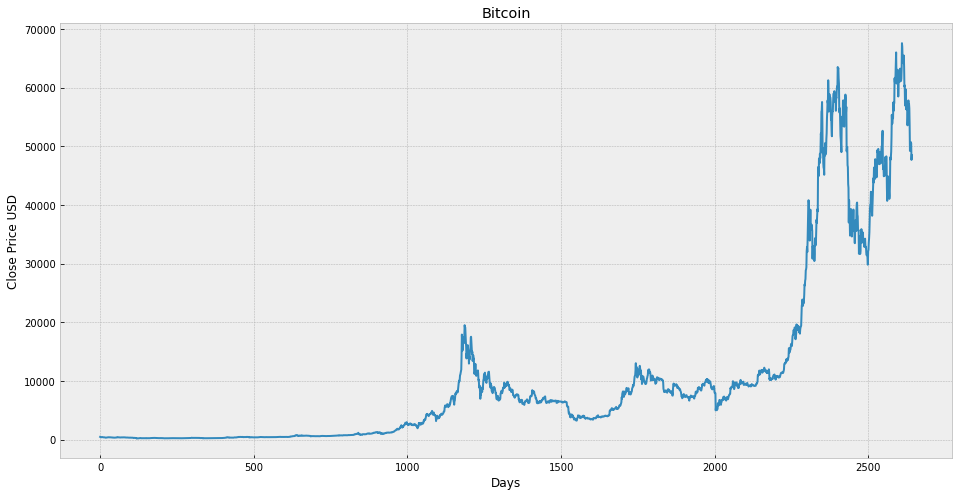

In [5]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])

In [6]:
df = df[['Close']]
df.head(4)

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992


In [7]:
future_days = 100
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

<ipython-input-7-9d4d13e4d583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
2638,50700.085938,NaN
2639,50504.796875,NaN
2640,47672.121094,NaN
2641,48460.320313,NaN


In [8]:
X = np.array(df.drop(['Prediction'], 1 ))[:-future_days]
print(X)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [47054.984375]
 [47166.6875  ]
 [48847.027344]]


In [9]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  327.924011   315.863007   317.239014 ... 50504.796875 47672.121094
 48460.320313]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train,y_train)

In [12]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[38402.222656],
       [39294.199219],
       [38436.96875 ],
       [35697.605469],
       [34616.066406],
       [35678.128906],
       [37332.855469],
       [36684.925781],
       [37575.179688],
       [39208.765625],
       [36894.40625 ],
       [35551.957031],
       [35862.378906],
       [33560.707031],
       [33472.632813],
       [37345.121094],
       [36702.597656],
       [37334.398438],
       [35552.515625],
       [39097.859375],
       [40218.476563],
       [40406.269531],
       [38347.0625  ],
       [38053.503906],
       [35787.246094],
       [35615.871094],
       [35698.296875],
       [31676.693359],
       [32505.660156],
       [33723.027344],
       [34662.4375  ],
       [31637.779297],
       [32186.277344],
       [34649.644531],
       [34434.335938],
       [35867.777344],
       [35040.835938],
       [33572.117188],
       [33897.046875],
       [34668.546875],
       [35287.78125 ],
       [33746.003906],
       [34235.195313],
       [338

In [13]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[49327.722656 60683.820313 49944.625    51753.410156 57484.789063
 46811.128906 46091.390625 46391.421875 44883.910156 45201.457031
 46063.269531 44963.074219 47092.492188 48176.347656 47783.359375
 62970.046875 46391.421875 46091.390625 42843.800781 50050.867188
 43574.507813 44895.097656 42839.75     42716.59375  43208.539063
 42235.730469 51753.410156 41564.363281 43790.894531 48116.941406
 57484.789063 58803.777344 49112.902344 57484.789063 55361.449219
 53805.984375 53967.847656 54968.222656 54771.578125 57484.789063
 56041.058594 57401.097656 57321.523438 61593.949219 60892.179688
 57401.097656 62026.078125 64261.992188 65992.835938 62210.171875
 60692.265625 61393.617188 60930.835938 60930.835938 60363.792969
 58482.386719 60622.136719 62227.964844 61888.832031 61318.957031
 58232.316406 63226.402344 62970.046875 61452.230469 66971.828125
 66971.828125 63326.988281 67566.828125 66971.828125 45201.457031
 64949.960938 66971.828125 64469.527344 46942.21875  63557.871094
 60161.246

<ipython-input-17-4712ff35181a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


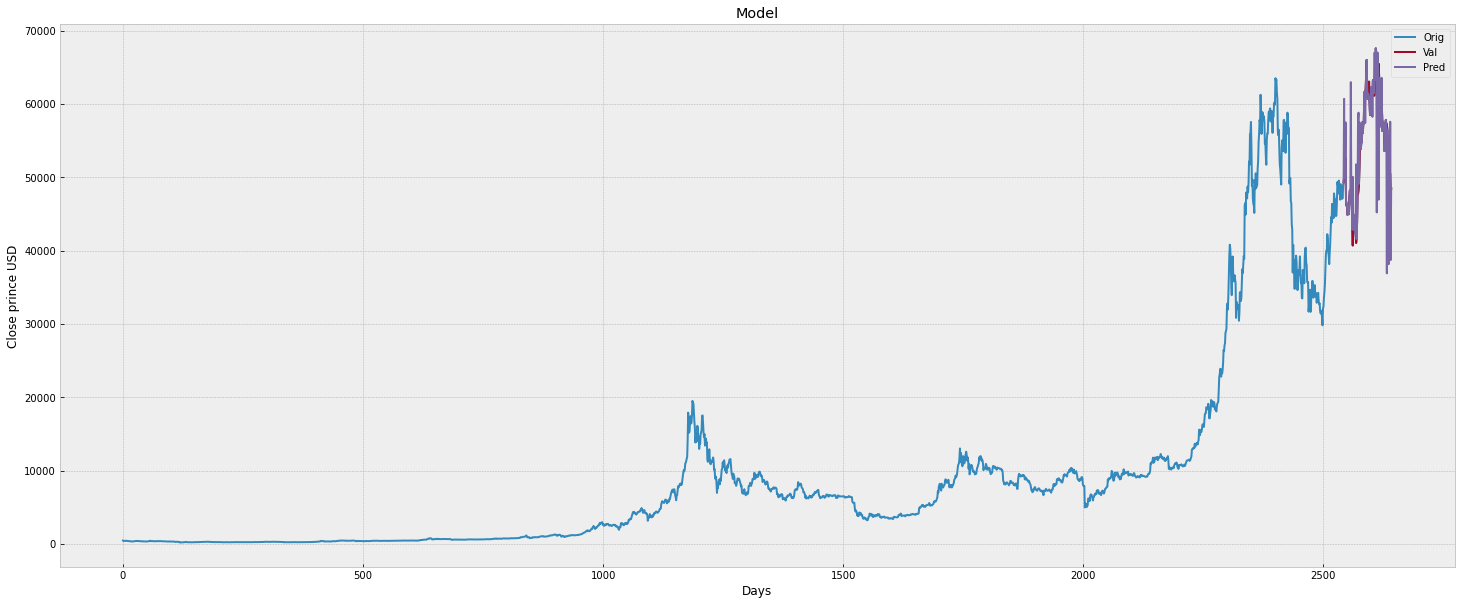

In [17]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prince USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-18-4670fea6a214>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


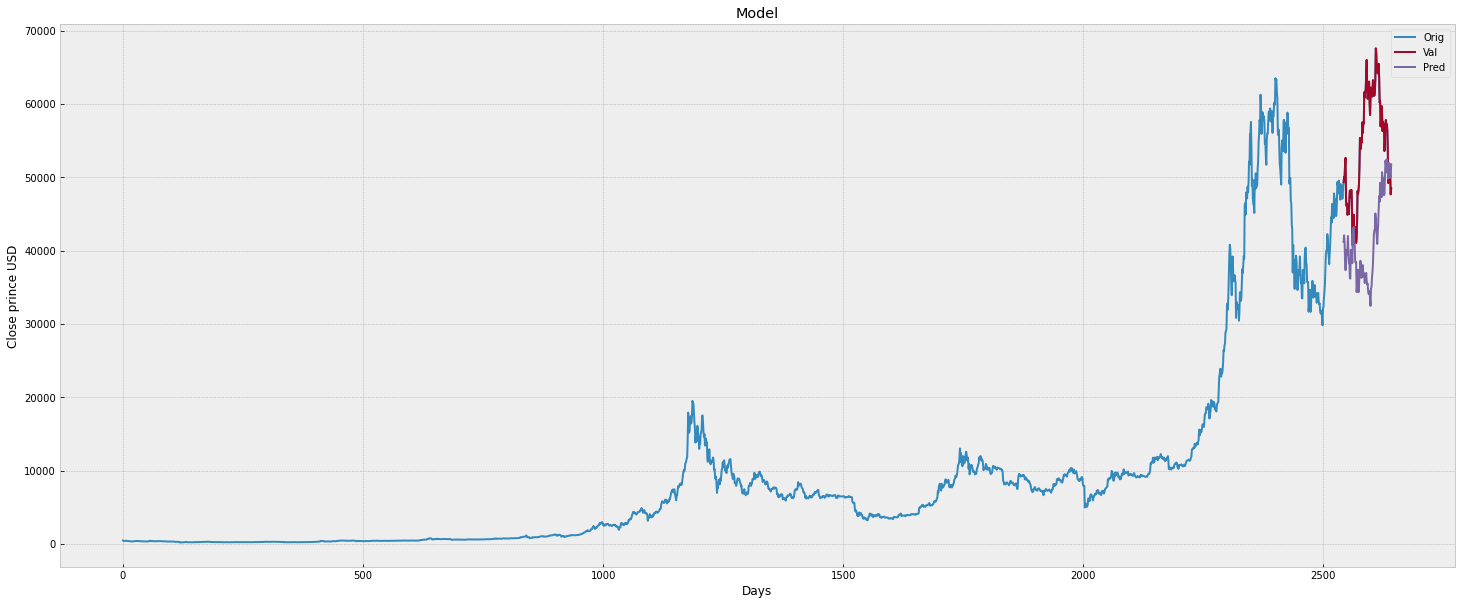

In [18]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(25,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close prince USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()